# MNIST Veri Seti ile Rakam Tanıma

https://www.kaggle.com/c/digit-recognizer/

MNIST veri seti $28\times 28$ pikselden oluşan elle yazılmış rakamlar içeren bir veri seti. Veri seti 32000 eğitim ve 10000 test rakamı içeriyor.

Normalde çok sınıflı bir sınıflandırma problemi olan rakam tanıma problemini güdümsüz öğrenme yöntemiyle ele alacağız. 

Şimdi paketleri yükleyerek örnek bir dosya okutalım.

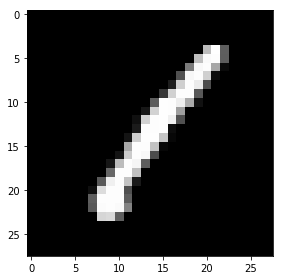

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import time as time
from skimage.io import imread, imshow, show, imsave
import matplotlib.pyplot as plt


train_size = 32000
test_size = 10000
picture_size = 28

image = imread('train/0.png', as_grey = True)
imshow(image)
show()

print(image)

'Train' ve 'Test' klasörlerindeki veriyi okuyarak başlayalım.

In [2]:
df_train = np.zeros((train_size, picture_size*picture_size))
   
for i in range(train_size):
    img = imread('train/' + str(i) + '.png', as_grey=True)
    img = np.reshape(img, (1,picture_size*picture_size))
    df_train[i,:]=img/255
    
df_train=pd.DataFrame(df_train)
df_train.columns = ['pixel_' + str(i) for i in range(picture_size*picture_size)]

y_train = pd.read_csv('train/labels_train.csv')


df_test = np.zeros((test_size, picture_size*picture_size))  

for i in range(train_size, train_size+test_size):
    img = imread('test/' + str(i) + '.png', as_grey=True)
    img = np.reshape(img, (1,picture_size*picture_size))
    df_test[i-train_size,:]=img/255
    
df_test=pd.DataFrame(df_test)
df_test.columns = ['pixel_' + str(i) for i in range(picture_size*picture_size)]

y_test = pd.read_csv('test/labels_test.csv')

print(len(df_train))
print(len(y_train))
print(len(df_test))
print(len(y_test))

print(df_train.iloc[1,:])

32000
32000
10000
10000
pixel_0      0.0
pixel_1      0.0
pixel_2      0.0
pixel_3      0.0
pixel_4      0.0
pixel_5      0.0
pixel_6      0.0
pixel_7      0.0
pixel_8      0.0
pixel_9      0.0
pixel_10     0.0
pixel_11     0.0
pixel_12     0.0
pixel_13     0.0
pixel_14     0.0
pixel_15     0.0
pixel_16     0.0
pixel_17     0.0
pixel_18     0.0
pixel_19     0.0
pixel_20     0.0
pixel_21     0.0
pixel_22     0.0
pixel_23     0.0
pixel_24     0.0
pixel_25     0.0
pixel_26     0.0
pixel_27     0.0
pixel_28     0.0
pixel_29     0.0
            ... 
pixel_754    0.0
pixel_755    0.0
pixel_756    0.0
pixel_757    0.0
pixel_758    0.0
pixel_759    0.0
pixel_760    0.0
pixel_761    0.0
pixel_762    0.0
pixel_763    0.0
pixel_764    0.0
pixel_765    0.0
pixel_766    0.0
pixel_767    0.0
pixel_768    0.0
pixel_769    0.0
pixel_770    0.0
pixel_771    0.0
pixel_772    0.0
pixel_773    0.0
pixel_774    0.0
pixel_775    0.0
pixel_776    0.0
pixel_777    0.0
pixel_778    0.0
pixel_779    0.0
pixel_7

Veri setini okuttuktan sonra güdümsüz öğrenme yöntemlerinden Mixture Model yöntemini kullanacağız. MM yöntemi soft-clustering imkanı tanıyan bir yöntem. Bir gözlem bir kümeye ait/ait değil bilgisinin yanında o kümeye ait olma olasılığını da elde etmek mümkün. Bu yöntemde bileşenler (component) profillere denk geliyor. Bu örnekte de bileşenler rakamların silhueti şeklinde olacak. 50 bileşenle modeli eğitelim. 

In [3]:
from sklearn.mixture import GMM

#Modeli yeterince yüksek bir bileşen sayısıyla oluşturup eğitelim.
....................


C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\byuceo

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=50, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

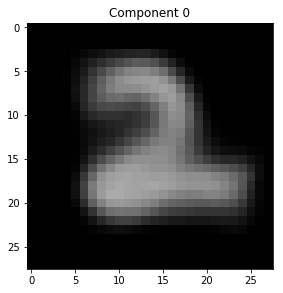

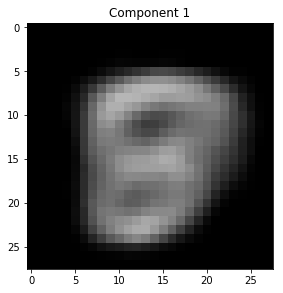

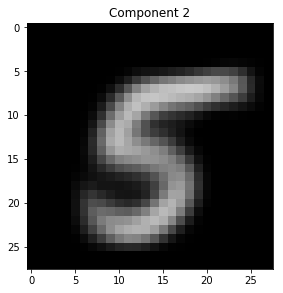

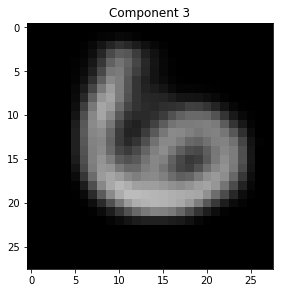

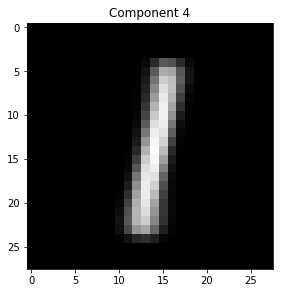

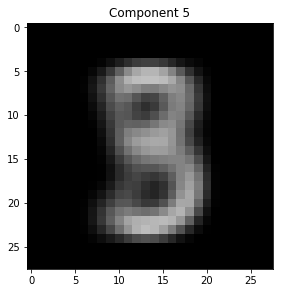

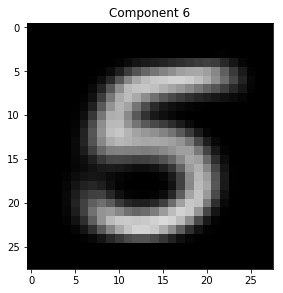

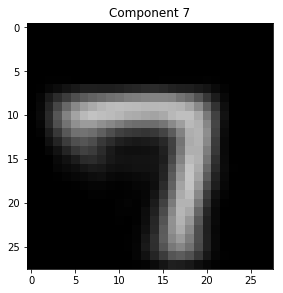

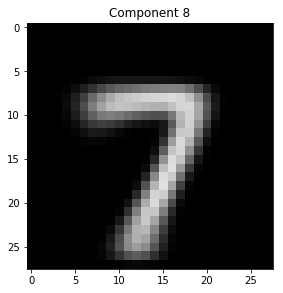

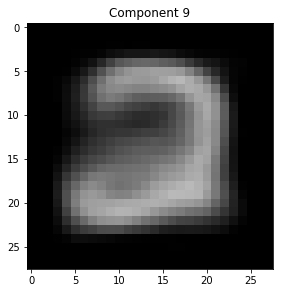

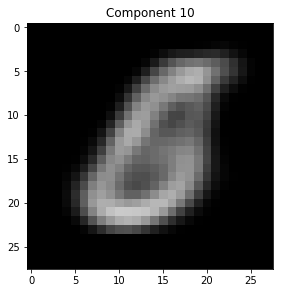

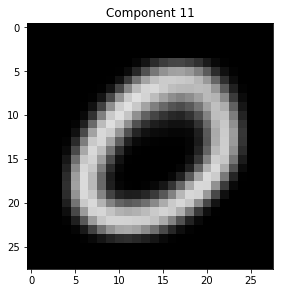

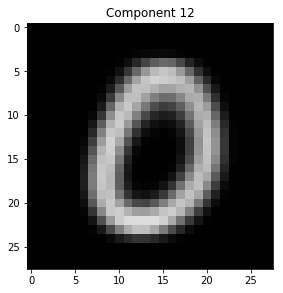

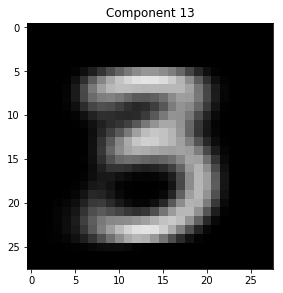

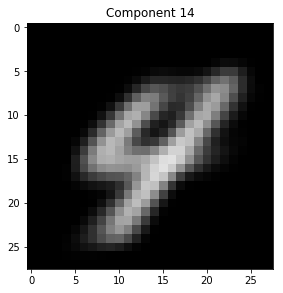

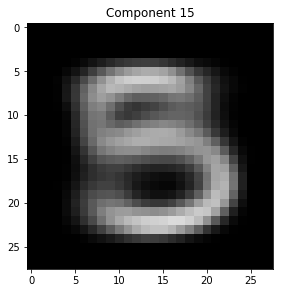

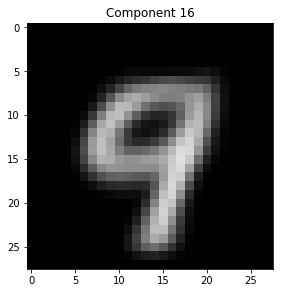

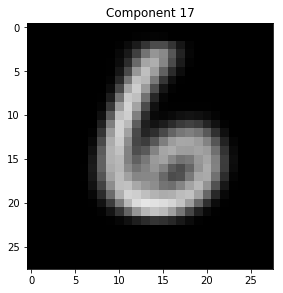

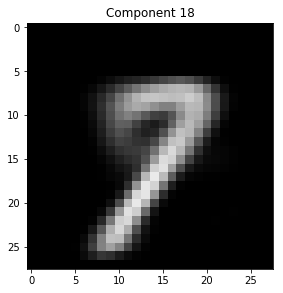

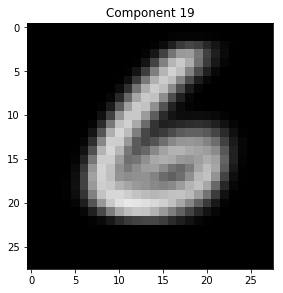

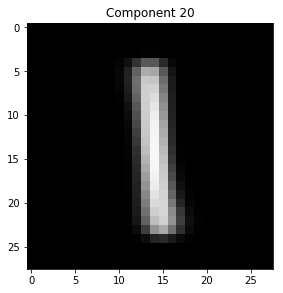

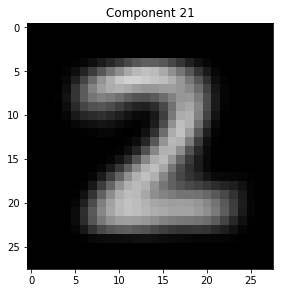

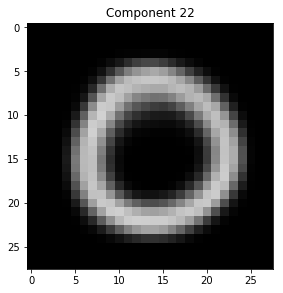

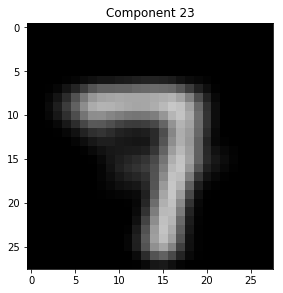

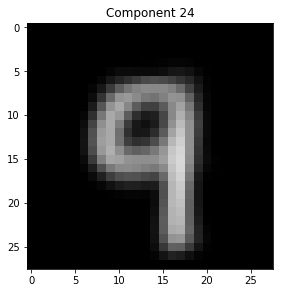

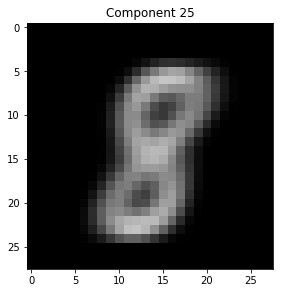

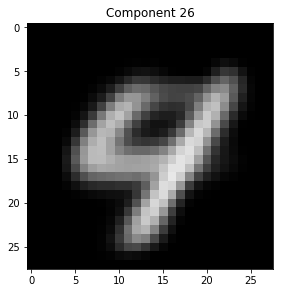

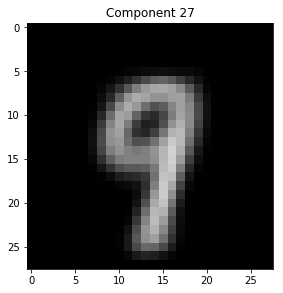

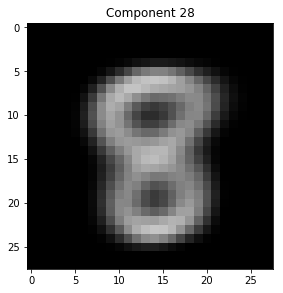

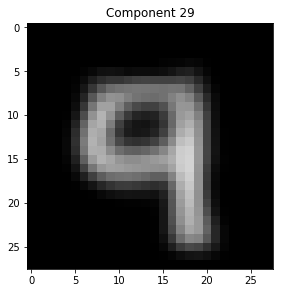

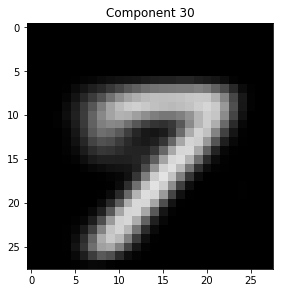

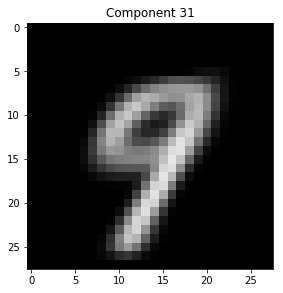

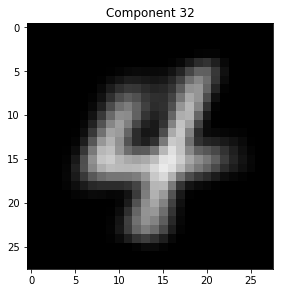

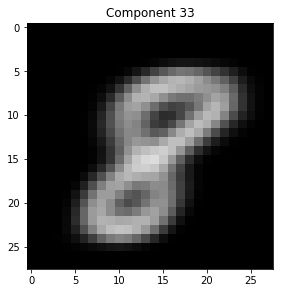

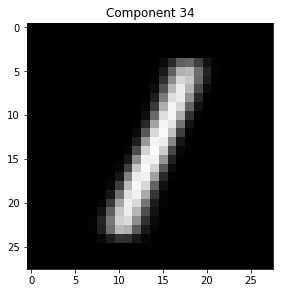

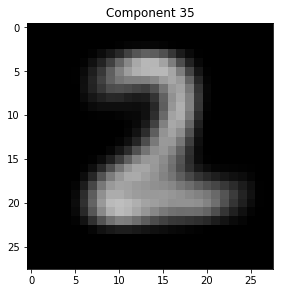

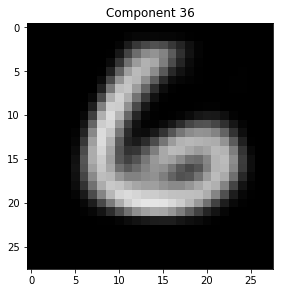

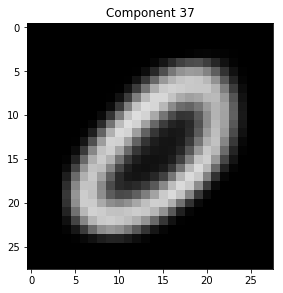

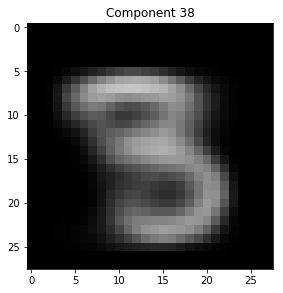

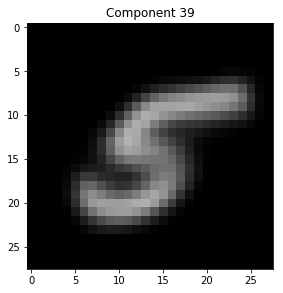

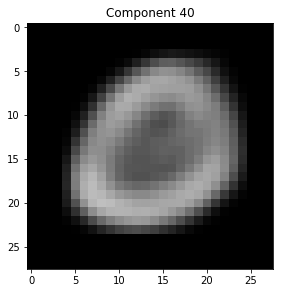

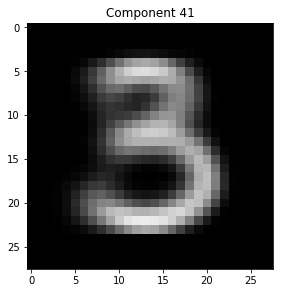

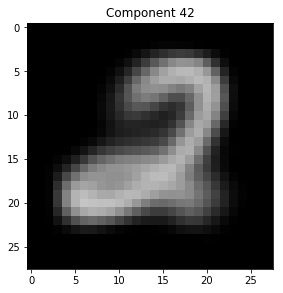

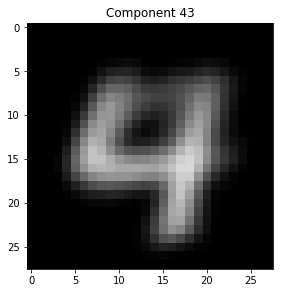

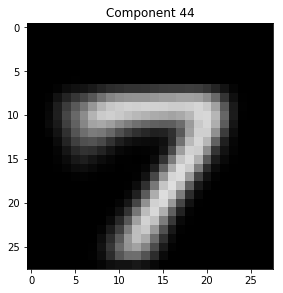

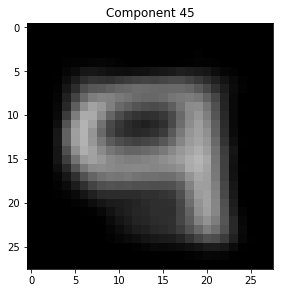

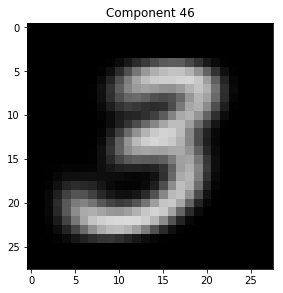

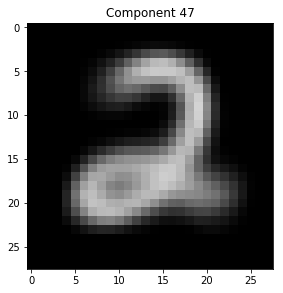

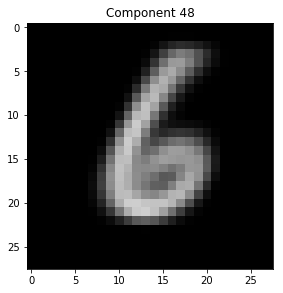

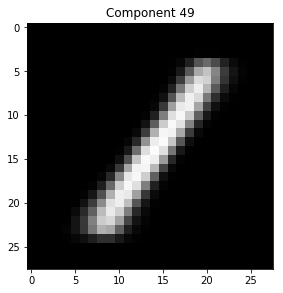

In [4]:
means = gmm.means_

for i in range(len(means)):
    component = means[i,:]
    component = np.reshape(component,(picture_size,picture_size))
    imshow(component)
    plt.title("Component " + str(i))
    show()

Gördüğümüz gibi bileşenler rakamlara oldukça benziyor. Şimdi bu olasılıklardan yeni bir veri çerçevesi oluşturalım.

In [5]:
probabilities = pd.DataFrame(..........)

print(probabilities.head())

C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


              0              1              2    3             4   \
0   0.000000e+00   0.000000e+00  4.527814e-306  0.0  0.000000e+00   
1   0.000000e+00  2.483450e-171   0.000000e+00  0.0  0.000000e+00   
2   0.000000e+00   0.000000e+00   0.000000e+00  0.0  5.874599e-10   
3  3.375612e-266   0.000000e+00   0.000000e+00  0.0  0.000000e+00   
4   0.000000e+00  1.796595e-260   0.000000e+00  0.0  0.000000e+00   

              5    6    7    8              9  ...              40   41  \
0   0.000000e+00  0.0  0.0  0.0   0.000000e+00 ...    0.000000e+00  0.0   
1   0.000000e+00  0.0  0.0  0.0  6.555218e-150 ...    3.972560e-99  0.0   
2  1.102435e-203  0.0  0.0  0.0   0.000000e+00 ...    0.000000e+00  0.0   
3   0.000000e+00  0.0  0.0  0.0  5.690066e-307 ...    0.000000e+00  0.0   
4   0.000000e+00  0.0  0.0  0.0  1.457482e-309 ...   1.582045e-118  0.0   

              42             43   44            45             46   47  \
0  3.001142e-308   0.000000e+00  0.0  0.000000e+00   0.00000

Bu olasılıkları Gradient Boosting yöntemine girdi olarak vererek güdümlü öğrenmede kullanabiliriz.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = .............

gbc...............

y_pred = gbc.................

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score of GBC: ' + str(accuracy_score(y_test,y_pred)))


df_results = pd.DataFrame(confusion_matrix(y_test, y_pred))

df_results.index = [['Label_' + str(i) for i in range(10)]]
df_results.columns = [['Pre_' + str(i) for i in range(10)]]

print('Confusion matrix for GBC: ')
print(df_results)

C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Accuracy score of GBC: 0.7569
Confusion matrix for GBC: 
         Pre_0  Pre_1  Pre_2  Pre_3  Pre_4  Pre_5  Pre_6  Pre_7  Pre_8  Pre_9
Label_0    863      0     10     26      3      1     57      0     51      0
Label_1      0   1066      8     11      4      2      5      0     36      7
Label_2     38      0    767     69     10      3     39      0     36      1
Label_3     11      3     74    808      5     13     20     17     87     11
Label_4     13      1     18     10    498      0     15      0     40    337
Label_5     25      1     14    162     23    466     67      1    118     15
Label_6     25      1     11      8      0      2    926      0     18      0
Label_7      1      0      8     20     31      2      1    803     34    158
Label_8     23      3      6    180      8     23     16      4    695     11
Label_9      3      0      2     21    187      2      0     78     26    677
